Prompt: Identify a large 2-node network dataset—you can start with a dataset in a repository. Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis. What can you infer about each of the distinct groups?

You may work in a small group on the project.

Your code and analysis should be delivered in an IPython Notebook by end of day Sunday.

- Overview: This analysis aims to explore the network of current NBA players to answer the simple question, Which players have been teammates?

- To answer the above question, the dataset contains one row per NBA player per year. For example, LeBron James has 16 rows in the dataset. One for each of the 16 NBA seasons he played. Furthermore, each row has the team the player was on.

In [1]:
import csv
import math
import networkx as nx
from networkx.algorithms import bipartite as bi
import matplotlib as plot
import pandas as pd

In [3]:
nba_data = csv.reader(open("C:\\Users\\jzw1jlf\\Documents\\Personal\\CUNY SPS\\DATA 620\\Week 6\\NBA_network.csv"))

In [9]:
print(nba_data)

In [11]:
g = nx.Graph()
teams = []
players = []

In [12]:
# enter all nodes and edges into the graph
for row in nba_data:
    if row[0] not in teams:
        teams.append(row[0])
    if row[1] not in players:
        players.append(row[1])
    g.add_edge(row[0], row[1], weight=1)

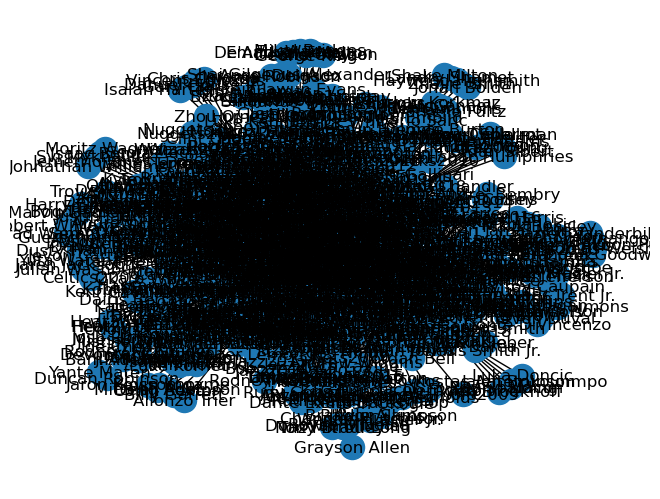

In [13]:
# draw the graph, as a giant blob
nx.draw(g, with_labels=True)

In [16]:
# for some clarity, print the nodes in the network
print( "nodes in network:", len(g))
print("teams in network:", len(teams))
print( "players in network:", len(players))

nodes in network: 827
teams in network: 298
players in network: 529


In [22]:
connected_net = list(nx.connected_components(g))
print("size of largest component:", len(connected_net[0]))

size of largest component: 827


- Since the largest component is equal to the number of total nodes, every player is somehow connected to every other player!

#### Part 2: Create Affiliation Networks

In [23]:
# create an affiliation network of only teams
teamnet = bi.weighted_projected_graph(g, teams)

In [24]:
# create an affiliation network of only players
# this will become our main network..
playernet = bi.weighted_projected_graph(g, players)

- Explore Centrality of Players

In [28]:
# look at degree centrality among players
deg = nx.degree(playernet)
deg_list = sorted(playernet.degree, key=lambda x: x[1], reverse=True)
#print "LeBron James' degree:", deg['LeBron James']
print("top 10 highest degree:")
deg_list[0:9]
#print "ok, this list looks like players that have stayed in NBA but bounced around.."

top 10 highest degree:


[('Anthony Tolliver', 76),
 ('Michael Beasley', 69),
 ('Jerryd Bayless', 68),
 ('Omri Casspi', 67),
 ('Marco Belinelli', 67),
 ('Jeremy Lin', 64),
 ('Corey Brewer', 64),
 ('Quincy Acy', 64),
 ('Lance Stephenson', 63)]

In [31]:
# look at closeness centrality of players
import operator
closeness_cen = nx.closeness_centrality(playernet)
closeness_list = sorted(closeness_cen.items(), key=operator.itemgetter(1))
#print "LeBron James' closeness:", closeness_cen['LeBron James']
print("top 10 highest closeness:")
closeness_list[520:529]

top 10 highest closeness:


[('Jerryd Bayless', 0.5038167938931297),
 ('Zaza Pachulia', 0.504297994269341),
 ('Michael Beasley', 0.5047801147227533),
 ('Jeremy Lin', 0.5057471264367817),
 ('Marco Belinelli', 0.5057471264367817),
 ('Kosta Koufos', 0.5067178502879078),
 ('Jeff Green', 0.5076923076923077),
 ('Jose Calderon', 0.5141187925998053),
 ('Anthony Tolliver', 0.5274725274725275)]

In [32]:
# look at betweenness centrality of players
betweenness_cen = nx.betweenness_centrality(playernet)
betweenness_list = sorted(betweenness_cen.items(), key=operator.itemgetter(1))
#print "LeBron James' betweenness:", betweenness_cen['LeBron James']
print("top 10 highest betweenness:")
betweenness_list[520:529]

top 10 highest betweenness:


[('Nick Young', 0.012476725270877566),
 ('Lance Stephenson', 0.012795678748128553),
 ('Corey Brewer', 0.013005003600704298),
 ('Marco Belinelli', 0.013344896469167866),
 ('Shelvin Mack', 0.013664354126294583),
 ('Jerryd Bayless', 0.01551351456282852),
 ('Michael Beasley', 0.015785183087930834),
 ('Anthony Tolliver', 0.01633441018532702),
 ('Isaiah Thomas', 0.018071047650223493)]

- The Island Method

In [36]:
# now, to see the players with the highest degree (start of the island method..)
print("degree, number of players")
deg_tests = [30, 40, 50, 60, 70, 80]
num_players = 0
for i in deg_tests:    
    for j in players:
        if deg(j)>i:
            num_players = num_players + 1
    print(i, num_players)
    num_players = 0

degree, number of players
30 253
40 135
50 55
60 14
70 1
80 0


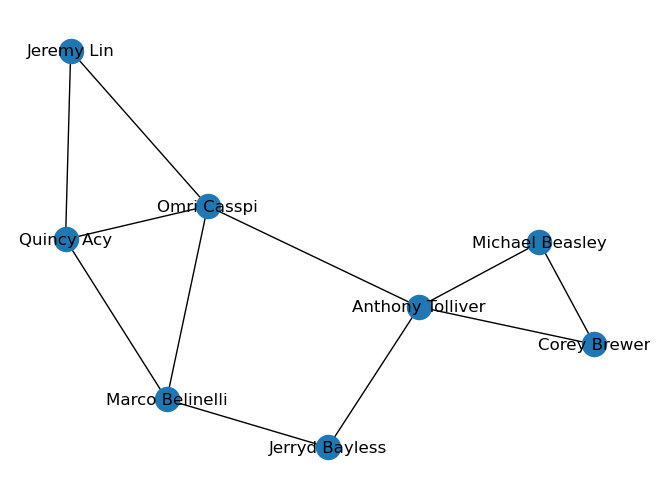

In [38]:
# let's look at only the players with 47+ degree
playernet64 = playernet.copy()
for i in players:
    if deg(i)<64:
        playernet64.remove_node(i)
nx.draw(playernet64, with_labels=True)

In [39]:
deg_list = sorted(playernet64.degree, key=lambda x: x[1], reverse=True)
deg_list[0:9]

[('Omri Casspi', 4),
 ('Anthony Tolliver', 4),
 ('Marco Belinelli', 3),
 ('Quincy Acy', 3),
 ('Jeremy Lin', 2),
 ('Michael Beasley', 2),
 ('Corey Brewer', 2),
 ('Jerryd Bayless', 2)]

- Network of Current All Stars

In [40]:
all_stars = ['James Harden',
             'Kevin Durant',
             'Kyrie Irving',
             'Kawhi Leonard',
             'LeBron James',
             'Anthony Davis',
             'Ben Simmons',
             'Bradley Beal',
             'Damian Lillard',
             'Dwayne Wade',
             'Karl-Anthony Towns',
             'Klay Thompson',
             'LaMarcus Aldridge',
             'Giannis Antetokounmpo',
             'Stephen Curry',
             'Joel Embiid',
             'Paul George',
             'Kemba Walker',
             'Blake Griffin',
             'DAngelo Russell',
             'Dirk Nowitzki',
             'Khris Middleton',
             'Kyle Lowry',
             'Nikola Jokic',
             'Nikola Vucevic',
             'Victor Oladipo',
             'Russell Westbrook']

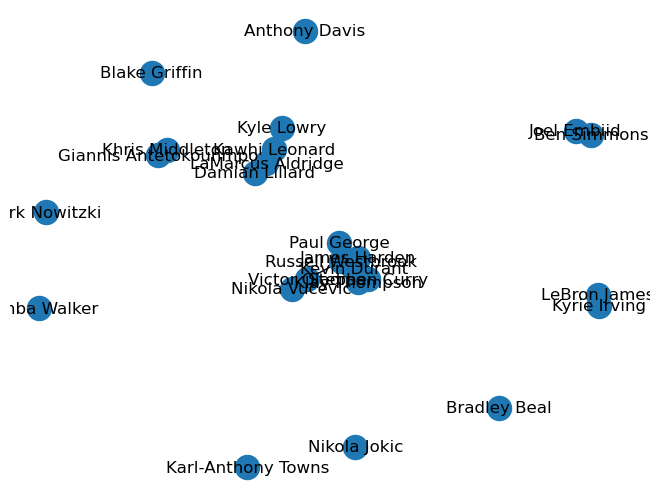

In [41]:
all_star_network = playernet.copy()
for i in players:
    if i not in all_stars:
        all_star_network.remove_node(i)
nx.draw(all_star_network, with_labels=True)

In [42]:
deg_list = sorted(all_star_network.degree, key=lambda x: x[1], reverse=True)
deg_list[0:4]

[('Russell Westbrook', 4),
 ('Kevin Durant', 4),
 ('Victor Oladipo', 2),
 ('Kawhi Leonard', 2)]

In [46]:
# look at components of the network
connected_net = list(nx.connected_components(all_star_network))
print("size of largest all star component:", len(connected_net[0]))

size of largest all star component: 4


#### Summary
- From the above code there are some valuable insights about the NBA network:

- First, the most connected player in the league based on all 2 types of centrality is Anthony Tolliver. Followed closely after him are Jeremy Lin and Michael Beasley

- Then, of the current NBA All Stars, the two all stars that have played with the most all stars are Kevin Durant and Russell Westbrook